# Artificial Intelligence- Supervised learning

**It is recommended to [view this notebook in nbviewer](http://nbviewer.ipython.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb) for the best viewing experience.**

**You can also [execute the code in this notebook on Binder](https://mybinder.org/v2/gh/rhiever/Data-Analysis-and-Machine-Learning-Projects/master?filepath=example-data-science-notebook%2FExample%20Machine%20Learning%20Notebook.ipynb) - no local installation required.**

## Introduction

[[ go back to the top ]](#Table-of-contents)

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.
In this notebook, we will be using Supervised learning to predict that learns the difference between stocks and which ones will be worth buying, based on financial indicators given by the 10-k fillings.

## The problem domain

[[ go back to the top ]](#Table-of-contents)

In this first approach to this data analysis problem, we need to specify what is the problem we want to solve, as well as defining a measure the success of the solution found. To help us accomplish that, we will go through some questions given by the data analysis checklist.

**Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?** 

>Our goal in this project is to classify stocks into 2 classes (0, if the their price will decrease in 2019, or 1 otherwise). This classification will be based on the details of each company given by their 10-k fillings during 2018.

**Did you define the metric for success before beginning?**

>Let's do that now. Since we are performing a classification, we can use accuracy (the fraction of correctly classified classes), to define a metric for the quality of our algorithm. After some research, we discovered that, in the long term, an algorithm that predicts stocks trend with less than 65 % of accuracy will underperform buy and hold strategy. We will try to match or beat this accuracy for the values of 2019.

**Did you record the experimental design?**

>No. We are using a public dataset from [Kaggle](https://www.kaggle.com/cnic92/beat-us-stock-market-data), that contains information about over 630 companies from the technology sector of the US stock market.

**Did you consider whether the question could be answered with the available data?**

>The dataset that we will be using only has information about aprominately 640 companies, all of them from the technology sector, which makes it harder to predict stock trends for the entire stock market.

Required libraries
[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the Anaconda Python distribution to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

conda install -c conda-forge watermark

## Step 1: Checking the data

The first step in any data science related problem is to look at the data we are working with. We need to check if there are any errors with the data, or if something needs to be fixed or removed.
Our dataset contains 2 different files: one of them has information relative to the 10-k fillings of the companies in 2018, and the other one has information about the price variation of the companies in 2019.

In [1]:
import pandas as pd
data_2018 = pd.read_csv("archive/Example_DATASET.csv", na_values=['NA'])
data_2019 = pd.read_csv("archive/Example_2019_price_var.csv", na_values=['NA'])


It seems like the length of the dataframes does not match. To fix this issue, we will merge both of them into one single dataframe. To do so we need to name the first column, which contains the name of the stock. 

In [2]:
data_2018.columns.values[0] = "Name"
data_2019.columns.values[0] = "Name"

full_data = pd.merge(data_2018, data_2019, on='Name', how='inner')
full_data.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,...,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,SG&A Expenses Growth,class,2019 PRICE VAR [%]
count,6.380000e+02,638.000000,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,4.313656e+09,0.200593,2.418867e+09,1.893674e+09,6.838895e+08,1.209286e+09,6.849852e+08,6.876940e+08,5.387035e+08,5.365020e+08,...,0.327554,0.354594,0.024223,0.342144,0.282030,0.160931,0.134593,0.112316,0.706897,29.000660
std,1.832010e+10,1.236156,1.060182e+10,8.412074e+09,2.367724e+09,5.087444e+09,4.005216e+09,4.214649e+09,3.416454e+09,3.416642e+09,...,4.700736,4.719772,10.419881,6.941349,1.567491,0.453783,1.487802,0.231320,0.455543,60.794866
min,0.000000e+00,-0.959300,0.000000e+00,-2.970810e+08,7.926000e+05,-6.190000e+05,-1.268450e+09,-1.326000e+09,-4.964000e+09,-4.964000e+09,...,-0.158700,-0.229800,-197.027800,-31.936200,-1.000000,-0.864500,-17.090900,-0.641900,0.000000,-98.760417
25%,1.027300e+08,0.008600,4.501450e+07,3.723250e+07,2.861450e+07,4.583850e+07,-9.972250e+06,-1.322625e+07,-1.706438e+07,-1.767875e+07,...,-0.000375,-0.002425,-0.217250,-0.316125,-0.037050,-0.032350,-0.106900,-0.013300,0.000000,-8.305380
50%,4.539775e+08,0.100800,1.950135e+08,2.097740e+08,1.291985e+08,1.934000e+08,8.819500e+06,6.248500e+06,4.420444e+06,4.163274e+06,...,0.014350,0.016250,0.118200,0.126250,0.099400,0.054200,0.035150,0.079900,1.000000,23.690020
75%,1.896714e+09,0.231325,9.058808e+08,8.405540e+08,4.252228e+08,6.439558e+08,1.660810e+08,1.378770e+08,1.100322e+08,1.090343e+08,...,0.060050,0.078225,0.497250,0.589150,0.282983,0.211925,0.174850,0.188800,1.000000,58.296104
max,2.655950e+11,29.980400,1.637560e+11,1.018390e+11,2.445900e+10,8.131000e+10,7.089800e+10,7.290300e+10,5.953100e+10,5.953100e+10,...,117.904200,117.904200,73.783500,148.819100,26.980800,3.653900,22.552600,1.944900,1.000000,478.821387


We're in luck! It seems like our data does not have any null's or Nan's cells which makes our preprocessing task way easier. The labels that we want to classify are already correctly placed in the dataframe (in the 'class' column). However, we notice that our dataset contains only 638 unique values, which means that our model should not be applied in a real life scenario.
Now let's take a look at how balanced is our dataset.

<AxesSubplot:>

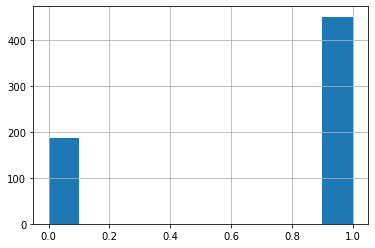

In [3]:
import matplotlib.pyplot as plt
full_data['class'].hist()

It seems like the dataframe is unbalanced, as most of the companies registered a positive price variation in 2019. This will be taken into account while evaluating the results.

The dataframe has 109 columns that may have duplicate or irrelevant information. This may increase the time it takes for our models to be trained, without resulting in better precision. 
To eliminate this data, we will use the correlation matrix. If the correlation between 2 columns is higher than 0.95, one of them can be dropped. 

In [4]:
import numpy as np
# Create correlation matrix
previous_columns = len(full_data.columns)
corr_matrix = full_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


# Drop features 
full_data.drop(to_drop, axis=1, inplace=True)

print("Dropped ", previous_columns - len(full_data.columns), " columns")


Dropped  48  columns


Great! We managed to drop 48 irrelevant columns.
Since our data does not contain outliers, we are ready to advance to the next step: applying the models.

## Classification

Now that we made sure our data is clean, we are ready to start modeling it!
Before we start classifying our data, we need to split it into a training set and a testing set. We will be using 80% of the data for training and 20% for testing. Since we have an unbalanced dataframe, we will stratify the data to make sure that the percentages of each class are similar in each split.

In [5]:
from sklearn.model_selection import train_test_split
all_inputs = full_data.drop(columns=["class", "Name", "2019 PRICE VAR [%]"])
all_labels = full_data['class'].values


(training_inputs,
  testing_inputs,
  training_classes,
  testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.2, stratify=full_data.drop(columns=["Name", "2019 PRICE VAR [%]"], inplace=True), random_state=1)


Before applying machine learning models to our data, there is one thing left to do: standardization of the data. We leverage the StandardScaler class from scikit-learn. If we didn't take this step, some estimators might behave badly if the individual features do not more or less look like standard normally distributed data.It is important to use the same coefficients for both training and test data. The scaler will be applied to all classifiers used.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(training_inputs)

inputs_train = scaler.transform(training_inputs)
inputs_test = scaler.transform(testing_inputs)

To avoid overfitting, we will be using cross validation for testing. We chose to use a 10-fold cross-validation as it is the most popular number of splits.

In [7]:
from sklearn.model_selection import StratifiedKFold
cross_validation = StratifiedKFold(n_splits=10)

### Decision trees
Now we have everything we need to start modeling the data. Let's start with a decision tree classifier.

Since we are aiming towards the best possible score, we will be using GridSearch for hyper-parameter tuning. The estimator we are using is **DecisionTreeClassifier** from scikit-learn, which accepts different parameters that can be changed in order to improve the results obtained. 
We are trying to find the best combination between 4 different parameters, that maximize the 'precision_weighted' score, as we know that the labels are unbalanced.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.tree as tree
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

decision_tree_classifier = DecisionTreeClassifier()
DTParameters = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [2, 3, 4, 5],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  }



dtgs = GridSearchCV(decision_tree_classifier,
                            param_grid=DTParameters,
                            cv=cross_validation,
                            scoring = "precision_weighted")


dtgs.fit(inputs_train, training_classes)

predictions_train = dtgs.predict(inputs_train)
predictions_test = dtgs.predict(inputs_test)


with open('decision_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(dtgs.best_estimator_ , out_file=out_file)
    
print('Best score, and parameters, found on development set:')
print()
print('%0.3f for %r' % (dtgs.best_score_, dtgs.best_params_))
print()


Best score, and parameters, found on development set:

0.724 for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'best'}



We got a precision_weighted score of 74.4%, which is pretty good. Here is the generated tree: 

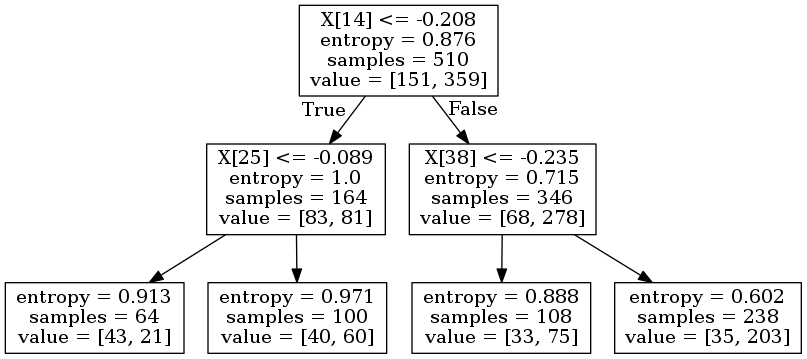
Now, let's use the model created to predict the values in training and testing set to detect possible overfitting. 

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtgs.best_estimator_, inputs_train, training_classes, cv=10, scoring="precision_weighted")
print("Scores: ", scores)

predictions_train = dtgs.predict(inputs_train)
predictions_test = dtgs.predict(inputs_test)

print("Testing set Confusion Matrix ")
print(confusion_matrix(testing_classes, predictions_test))

print("Training set accuracy: ", accuracy_score(training_classes, predictions_train))
print("Testing set accuracy: ", accuracy_score(testing_classes, predictions_test))

print("Classification report:")
report_dtrees = classification_report(testing_classes, predictions_test, target_names=['IGNORE', 'BUY'])
print(report_dtrees)


Scores:  [0.61918605 0.6377709  0.66470588 0.80235294 0.62404092 0.6114082
 0.4982699  0.71078431 0.71078431 0.63871506]
Testing set Confusion Matrix 
[[ 6 30]
 [ 7 85]]
Training set accuracy:  0.7647058823529411
Testing set accuracy:  0.7109375
Classification report:
              precision    recall  f1-score   support

      IGNORE       0.46      0.17      0.24        36
         BUY       0.74      0.92      0.82        92

    accuracy                           0.71       128
   macro avg       0.60      0.55      0.53       128
weighted avg       0.66      0.71      0.66       128



As we can see, both training and testing scores are similar, which is a good indicative that our model is not overfitting the training data.

### Neural networks

After achieving promising results with the decision tree classifier, we will now explore the **MLPClassifier** class. We will be using GridSearch to find the best combination between 6 parameters: `hidden_layer_sizes`, `learning_rate`, `power_t`, `activation`, `alpha` and `solver`. The number of cross-validation sets is 10.

In [10]:
from sklearn.neural_network import MLPClassifier
neural_network_classifier = MLPClassifier()

MLPParameters = {
    "learning_rate": ["adaptive", "constant"],
    "alpha": [0.0001, 0.05],
    "power_t": [0.25, 0.5, 0.75],
    'activation': ['tanh', 'relu', "logistic"],
    'hidden_layer_sizes': [(32,), (64,), (32, 64, 32)],
    'solver': ['adam', 'sgd']
  }


mlpgs = GridSearchCV(neural_network_classifier, MLPParameters, n_jobs=-1, scoring = "precision_weighted", cv = cross_validation)

mlpgs.fit(inputs_train, training_classes)

print('Best score, and parameters, found on development set:')
print()
print('%0.3f for %r' % (mlpgs.best_score_, mlpgs.best_params_))
print()

Best score, and parameters, found on development set:

0.759 for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'power_t': 0.25, 'solver': 'sgd'}



Using multi-layer perceptron, we managed to get a precision score of 74,8%, which is slightly superior to the decision tree model. However, due to the high number of parameters passed tried in grid search, finding this model takes significantly more time than the previous classifier.   
Now let's print the results for this estimator.


In [11]:
predictions_train = mlpgs.predict(inputs_train)
predictions_test = mlpgs.predict(inputs_test)

print("Testing set Confusion Matrix ")
print(confusion_matrix(testing_classes, predictions_test))

print("Training accuracy: ", accuracy_score(training_classes, predictions_train))
print("Testing accuracy: ", accuracy_score(testing_classes, predictions_test))
print(classification_report(testing_classes, predictions_test, target_names=['IGNORE', 'BUY']))

Testing set Confusion Matrix 
[[ 5 31]
 [ 3 89]]
Training accuracy:  0.7509803921568627
Testing accuracy:  0.734375
              precision    recall  f1-score   support

      IGNORE       0.62      0.14      0.23        36
         BUY       0.74      0.97      0.84        92

    accuracy                           0.73       128
   macro avg       0.68      0.55      0.53       128
weighted avg       0.71      0.73      0.67       128



As we can see, training accuracy and testing accuracy are similar, which means that the model is not overfitting the training data.

### Support Vector Machines

The third machine learning model that we will test is the support vector machine. In this model, GridSearchCV will tune 5 hyper-parameters (`kernel`, `gamma`, `C`, `srinking` and `class_weight`) from the **SVC** estimator.

In [12]:
from sklearn.svm import SVC

SVMParameters = {
    "kernel": ["rbf", "linear", "poly", "sigmoid"],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'C': [0.01, 0.1, 1, 10, 100],
    "class_weight": [None, 'balanced']
    }


svmgs = GridSearchCV(SVC(), SVMParameters, n_jobs = -1, scoring="precision_weighted", cv=cross_validation)



svmgs.fit(inputs_train, training_classes)


print('Best score and parameters found on development set:')
print()
print('%0.3f for %r' % (svmgs.best_score_, svmgs.best_params_))
print()


Best score and parameters found on development set:

0.753 for {'C': 1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'sigmoid', 'shrinking': True}



The weighted precision obtained was 75,3% - the best so far! Let's print the classification report and confusion matrix to evaluate this model's quality.

In [13]:
predictions_train = svmgs.predict(inputs_train)
predictions_test = svmgs.predict(inputs_test)


print("Testing set Confusion Matrix ")
print(confusion_matrix(testing_classes, predictions_test))


print("Training accuracy: ", accuracy_score(training_classes, predictions_train))
print("Testing accuracy: ", accuracy_score(testing_classes, predictions_test))

print(classification_report(testing_classes, predictions_test, target_names=['IGNORE', 'BUY']))


Testing set Confusion Matrix 
[[ 3 33]
 [ 4 88]]
Training accuracy:  0.711764705882353
Testing accuracy:  0.7109375
              precision    recall  f1-score   support

      IGNORE       0.43      0.08      0.14        36
         BUY       0.73      0.96      0.83        92

    accuracy                           0.71       128
   macro avg       0.58      0.52      0.48       128
weighted avg       0.64      0.71      0.63       128



### K-Nearest Neighbours

The last estimator implemented is the k-nearest neighbours model. We're using the **KNeighborsClassifier** from sklearn and GridSearchCV to tune the folowing hyper-parameters: `n_neighbors`, `weights`, `algorithm` and `p`.

In [14]:
from sklearn.neighbors import KNeighborsClassifier


KNNParameters = {'n_neighbors': list(range(1,10)),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p':[1,2]}


knngs = GridSearchCV(KNeighborsClassifier(), KNNParameters, n_jobs=-1, scoring="precision_weighted", cv=cross_validation)

knngs.fit(inputs_train, training_classes)

print('Best score and parameters found on development set:')
print()
print('%0.3f for %r' % (knngs.best_score_, knngs.best_params_))
print()

Best score and parameters found on development set:

0.703 for {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}



As expected, this estimator offers a worse solution, as it is a lazy algorithm that does not need any training data points for model generation. All training data used in the testing phase. Now let's apply this model to the testing set and see how it performs.

In [15]:
predictions_train = knngs.predict(inputs_train)
predictions_test = knngs.predict(inputs_test)


print("Testing set Confusion Matrix ")
print(confusion_matrix(testing_classes, predictions_test))


print("Training accuracy: ", accuracy_score(training_classes, predictions_train))
print("Testing accuracy: ", accuracy_score(testing_classes, predictions_test))

print(classification_report(testing_classes, predictions_test, target_names=['IGNORE', 'BUY']))

Testing set Confusion Matrix 
[[ 8 28]
 [14 78]]
Training accuracy:  0.7901960784313725
Testing accuracy:  0.671875
              precision    recall  f1-score   support

      IGNORE       0.36      0.22      0.28        36
         BUY       0.74      0.85      0.79        92

    accuracy                           0.67       128
   macro avg       0.55      0.54      0.53       128
weighted avg       0.63      0.67      0.64       128



The difference between training results and test results is significantly higher than in other models. This shows that this model is overfitting the training data.

## Comparing results

[Text(0, 0, 'Decision Trees'),
 Text(1, 0, 'Neural Networks'),
 Text(2, 0, 'Support Vector Machine'),
 Text(3, 0, 'K Nearest Neighbours')]

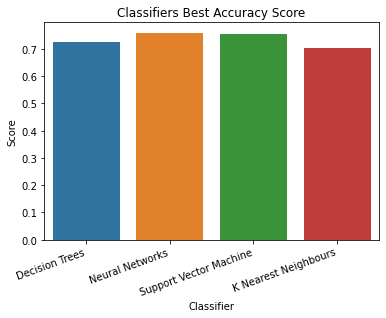

In [19]:
import seaborn as sb
score_df = pd.DataFrame()
best_scores = {}
best_scores['Decision Trees'] = dtgs.best_score_
best_scores['Neural Networks'] = mlpgs.best_score_
best_scores['Support Vector Machine'] = svmgs.best_score_
best_scores['K Nearest Neighbours'] = knngs.best_score_
for name, score in best_scores.items():
    score_df = score_df.append(pd.DataFrame({'Score': [score], 'Classifier': [name]}))
ax = sb.barplot(x='Classifier', y='Score', data=score_df)
ax.set_title('Classifiers Best Accuracy Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

[Text(0, 0, 'Decision Trees'),
 Text(1, 0, 'Neural Networks'),
 Text(2, 0, 'Support Vector Machine'),
 Text(3, 0, 'K Nearest Neighbours')]

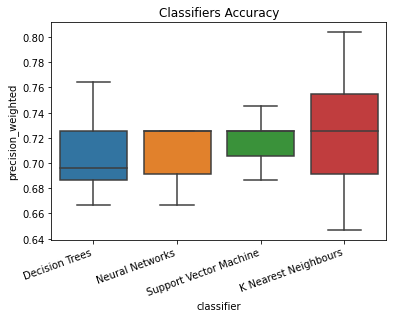

In [32]:
classifiers = {}
classifiers['Decision Trees'] = dtgs.best_estimator_
classifiers['Neural Networks'] = mlpgs.best_estimator_
classifiers['Support Vector Machine'] = svmgs.best_estimator_
classifiers['K Nearest Neighbours'] = knngs.best_estimator_
clf_df = pd.DataFrame()
for name, clf in classifiers.items():
    clf_df = clf_df.append(pd.DataFrame({'precision_weighted': cross_val_score(clf, inputs_train, training_classes, cv=StratifiedKFold(n_splits=10)),
                       'classifier': [name] * 10}))

ax = sb.boxplot(x='classifier', y='precision_weighted', data=clf_df)
ax.set_title('Classifiers Accuracy')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

[Text(0, 0, 'Decision Trees'),
 Text(1, 0, 'Neural Networks'),
 Text(2, 0, 'Support Vector Machine'),
 Text(3, 0, 'K Nearest Neighbours')]

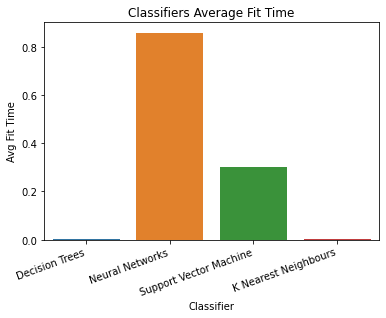

In [41]:
fittime_df = pd.DataFrame()
fit_times = {}
fit_times['Decision Trees'] = np.mean(dtgs.cv_results_['mean_fit_time'])
fit_times['Neural Networks'] = np.mean(mlpgs.cv_results_['mean_fit_time'])
fit_times['Support Vector Machine'] = np.mean(svmgs.cv_results_['mean_fit_time'])
fit_times['K Nearest Neighbours'] = np.mean(knngs.cv_results_['mean_fit_time'])
for name, fittime in fit_times.items():
    fittime_df = fittime_df.append(pd.DataFrame({'Avg Fit Time': [fittime], 'Classifier': [name]}))
    
ax = sb.barplot(x='Classifier', y='Avg Fit Time', data=fittime_df)
ax.set_title('Classifiers Average Fit Time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

Text(33.0, 0.5, 'max_depth')

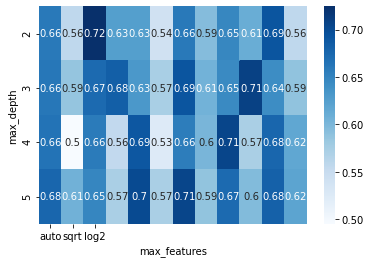

In [67]:
grid_visualization = dtgs.cv_results_['mean_test_score']
grid_visualization.shape = (4, 12)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(3) + 0.5, dtgs.param_grid['max_features'])
plt.yticks(np.arange(4) + 0.5, dtgs.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

array([0.6602184 , 0.55697878, 0.72430267, 0.62500154, 0.62524248,
       0.54124754, 0.66054416, 0.59457806, 0.64793142, 0.61124078,
       0.6919448 , 0.55719026, 0.66088625, 0.58634987, 0.67238445,
       0.68260037, 0.63168026, 0.57335827, 0.69138305, 0.60580523,
       0.64548189, 0.70923638, 0.64221827, 0.58872068, 0.66462147,
       0.49512495, 0.65874441, 0.55594156, 0.69022558, 0.52553326,
       0.65673267, 0.60206415, 0.70615242, 0.57229951, 0.67625083,
       0.61717339, 0.67612709, 0.60698908, 0.64859659, 0.57226392,
       0.70128364, 0.5729215 , 0.70564841, 0.58821812, 0.67267   ,
       0.59695752, 0.68092126, 0.61996247])